In [10]:
import numpy as np; import pandas as pd; import pyodbc; import datetime; import sklearn; import os; import math
from sklearn import feature_selection, linear_model, grid_search, cross_validation, metrics, ensemble, learning_curve 
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.manifold import TSNE
import pickle
import xgboost as xgb
from sklearn.feature_selection import chi2, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
%pylab inline 
import sys
import warnings
conn = pyodbc.connect(r'DRIVER={SQL Server Native Client 11.0};'r'SERVER=WIN-5G5AUOCEJPK;'r'DATABASE=Gold585;'r'Trusted_Connection=yes;')

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from IPython.core.display import display,HTML

display(HTML("<style>.container{width:90% !important;}</style>"))

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Открытый займ - вернет/не вернет/перезайм

In [42]:
sql_query2 = "SELECT [Code] \
      ,[PartnerID] \
      ,IIf([Sex]='M',1,IIf([Sex]='F',0,NULL)) Sex \
      ,[Age] \
      ,[CreditCondition] \
      ,[LombardRating] \
      ,[CountryID] \
      ,[TreasuryID] \
      ,[LombardCategoryID] \
      ,[City] \
      ,[Category] \
      ,[AmountZB] \
      ,[Qty] \
      ,[IssueDate] \
      ,[TermWoutGracePeriod] \
      ,[WeightGross] \
      ,[WeightNet] \
      ,[WeightNet999] \
      ,[WeightNotBrilliant] \
      ,[WeightNet999Calc] \
      ,[Cost] \
      ,[CostMetal] \
      ,[CostPerGram] \
      ,[CostInsert] \
      ,[Proba] \
      ,[PromoActionID] \
      ,[PromotionID] \
      ,[CostAmount] \
      ,[PercentPerDay] \
      ,IIF([FlagNewPartner]=1,1,0) FlagNewPartner  \
      ,[DneySProshZB] \
      ,[DoSumAmountzb] \
      ,[DoAVGAmountzb] \
      ,[DoZB] \
      ,[DoBad] \
      ,[DoSumBad] \
      ,[DoGood] \
      ,[DoPercentGood] \
      ,[DoSumGood] \
      ,[DoMaxBadPercentPerDay] \
      ,[DoAVGBadPercentPerDay] \
      ,[DoMinGoodPercentPerDay] \
      ,[DoAVGGoodPercentPerDay] \
      ,[DoIssue] \
      ,[DoQntNew] \
      ,[DoQntPerez] \
      ,[DoQntOSN] \
      ,[DoQntBuyUp] \
      ,[DoAVGDneyZaloga] \
      ,[DoAVGDneySProshZB] \
      ,[DoAVGWeightGross] \
      ,[DoSUMWeightGross] \
      ,[DoAVGWeightNet] \
      ,[DoSUMWeightNet] \
      ,[DoAVGWeightNet999] \
      ,[DoSUMWeightNet999] \
      ,[DoAVGWeightNotBrilliant] \
      ,[DoSUMWeightNotBrilliant] \
      ,[DoAVGCostPerGram] \
      ,[DoAVGCost] \
      ,[DoMaxCost] \
      ,[DoQntTreasury] \
      ,[DoAVGPercentPerDay] \
      ,[DoMINPercentPerDay] \
      ,[DoMAXPercentPerDay] \
      ,[OverPayAmount] \
      ,[PercentAmount] \
      ,[isGoodZB] \
      ,[isBadZB] \
      ,[BudetSledVisit] \
      ,[BudetPerezalog] \
  FROM [Gold585].[dbo].[CommonTable1] \
  Where IssueDate < convert(datetime,'2018-06-01') and Category in ('Новая cсуда')"
data1 = pd.read_sql(sql_query2,conn)

In [43]:
data1.head()

,Code,PartnerID,Sex,Age,CreditCondition,LombardRating,CountryID,TreasuryID,LombardCategoryID,City,...,DoQntTreasury,DoAVGPercentPerDay,DoMINPercentPerDay,DoMAXPercentPerDay,OverPayAmount,PercentAmount,isGoodZB,isBadZB,BudetSledVisit,BudetPerezalog
0,930003539385,7372,0.0,47,4,2,0,54,58,39369AE2544E3327043BEE6D7C268073257C387E22F0F4...,...,2,0.3318,0.25,0.45,4850.399902,7437.279785,1,0,1,1
1,930003775190,7372,0.0,47,4,2,0,54,58,39369AE2544E3327043BEE6D7C268073257C387E22F0F4...,...,2,0.3367,0.25,0.45,1408.939941,1784.650024,1,0,1,1
2,930003850691,7372,0.0,48,4,2,0,54,58,39369AE2544E3327043BEE6D7C268073257C387E22F0F4...,...,2,0.3433,0.25,0.45,1032.000000,1582.400024,1,0,1,0
3,620000026382,7372,0.0,48,4,2,0,513,134,39369AE2544E3327043BEE6D7C268073257C387E22F0F4...,...,4,0.3587,0.25,0.45,5547.000000,0.000000,0,1,1,0
4,620000215021,7372,0.0,48,2,2,0,499,123,39369AE2544E3327043BEE6D7C268073257C387E22F0F4...,...,4,0.3615,0.25,0.45,0.000000,0.000000,1,0,1,0


In [ ]:
data1.dtypes

In [5]:
data1.describe()

,PartnerID,Age,CreditCondition,LombardRating,CountryID,TreasuryID,LombardCategoryID,AmountZB,Qty,TermWoutGracePeriod,...,DoQntTreasury,DoAVGPercentPerDay,DoMINPercentPerDay,DoMAXPercentPerDay,OverPayAmount,PercentAmount,isGoodZB,isBadZB,BudetSledZalog,BudetPerezalog
count,4.047471e+06,4.047471e+06,4.047471e+06,4.047471e+06,4047471.0,4.047471e+06,4.047471e+06,4.047471e+06,4.047471e+06,4.047471e+06,...,4.047471e+06,4.047471e+06,4.047471e+06,4.047471e+06,4.047471e+06,4.047471e+06,4.047471e+06,4.047471e+06,4.047471e+06,4.047471e+06
mean,1.032540e+06,3.789605e+01,1.560667e+00,1.988101e+00,0.0,2.360303e+02,8.153048e+01,7.960623e+03,1.771421e+00,4.172980e+01,...,1.282096e+00,2.502696e-01,2.162047e-01,2.907453e-01,1.195490e+03,3.911830e+02,7.367811e-01,2.631888e-01,8.477684e-01,2.378372e-01
std,1.169353e+06,1.409678e+01,1.687753e+00,1.939535e+00,0.0,2.229586e+02,8.900342e+01,1.814014e+04,1.816805e+00,1.828910e+01,...,1.276781e+00,1.738560e-01,1.584927e-01,2.535976e-01,1.352267e+04,1.471711e+03,4.403803e-01,4.403641e-01,3.592453e-01,4.257590e-01
min,0.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,0.0,3.000000e+00,0.000000e+00,9.990000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.701310e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.250740e+05,2.800000e+01,0.000000e+00,0.000000e+00,0.0,5.900000e+01,1.200000e+01,2.100000e+03,1.000000e+00,3.000000e+01,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,4.152780e+05,3.600000e+01,1.000000e+00,2.000000e+00,0.0,1.410000e+02,5.600000e+01,4.000000e+03,1.000000e+00,3.000000e+01,...,1.000000e+00,2.914000e-01,2.400000e-01,3.500000e-01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.564657e+06,4.800000e+01,3.000000e+00,3.000000e+00,0.0,4.790000e+02,1.030000e+02,7.814000e+03,2.000000e+00,6.000000e+01,...,2.000000e+00,3.500000e-01,3.000000e-01,4.000000e-01,1.252800e+02,2.400000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,5.675419e+06,9.900000e+01,8.000000e+00,8.000000e+00,0.0,8.260000e+02,4.050000e+02,3.023000e+06,2.300000e+01,9.000000e+01,...,2.100000e+01,2.700000e+00,2.700000e+00,2.700000e+00,4.008498e+06,2.715300e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [20]:
data1['Sex'].replace('F',0,inplace=True)
data1['Sex'].replace('M',1,inplace=True)
data1['Sex'].replace('U',-1,inplace=True)

In [21]:
cormatrx=data1.corr()
cormatrx

,PartnerID,Age,CreditCondition,LombardRating,CountryID,TreasuryID,LombardCategoryID,AmountZB,Qty,TermWoutGracePeriod,...,DoQntTreasury,DoAVGPercentPerDay,DoMINPercentPerDay,DoMAXPercentPerDay,OverPayAmount,PercentAmount,isGoodZB,isBadZB,BudetSledZalog,BudetPerezalog
PartnerID,1.000000,-0.007256,-0.204704,-0.126946,NaN,0.482366,0.426927,0.010617,-0.026025,-0.333712,...,-0.186726,-0.197874,-0.156913,-0.202246,-0.038493,-0.055825,-0.005126,0.005064,-0.140988,0.001500
Age,-0.007256,1.000000,0.036381,-0.159094,NaN,0.097587,0.084929,0.041050,0.017690,-0.017424,...,0.143215,0.076172,0.041997,0.097378,0.002032,0.032641,0.175430,-0.175420,0.136533,0.084580
CreditCondition,-0.204704,0.036381,1.000000,0.411122,NaN,0.133340,0.131811,0.122011,0.078780,0.121693,...,0.402692,0.425808,0.367174,0.359063,0.111905,0.090333,0.184020,-0.184079,0.245224,0.145856
LombardRating,-0.126946,-0.159094,0.411122,1.000000,NaN,0.034643,0.041568,0.047193,0.014498,0.121022,...,0.209231,0.248968,0.229038,0.192150,0.028804,0.082106,0.210098,-0.210143,0.307002,0.119589
CountryID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TreasuryID,0.482366,0.097587,0.133340,0.034643,NaN,1.000000,0.849383,0.058243,-0.026589,-0.306486,...,0.317899,0.091913,0.052012,0.088478,0.007238,-0.148693,0.121843,-0.121949,0.031866,0.095770
LombardCategoryID,0.426927,0.084929,0.131811,0.041568,NaN,0.849383,1.000000,0.058333,-0.022369,-0.239560,...,0.274331,0.085577,0.051248,0.082073,0.013239,-0.130664,0.117062,-0.117162,0.040600,0.090477
AmountZB,0.010617,0.041050,0.122011,0.047193,NaN,0.058243,0.058333,1.000000,0.389977,0.000336,...,0.120211,0.003933,-0.019261,0.025650,0.435542,0.421784,0.026266,-0.026275,0.055070,0.046647
Qty,-0.026025,0.017690,0.078780,0.014498,NaN,-0.026589,-0.022369,0.389977,1.000000,0.008317,...,0.042975,-0.004344,-0.012971,0.016190,0.376708,0.194044,-0.078876,0.078868,0.030347,0.028908
TermWoutGracePeriod,-0.333712,-0.017424,0.121693,0.121022,NaN,-0.306486,-0.239560,0.000336,0.008317,1.000000,...,0.032627,0.142048,0.159402,0.104877,0.064791,0.086875,0.073373,-0.073366,0.114573,-0.012232


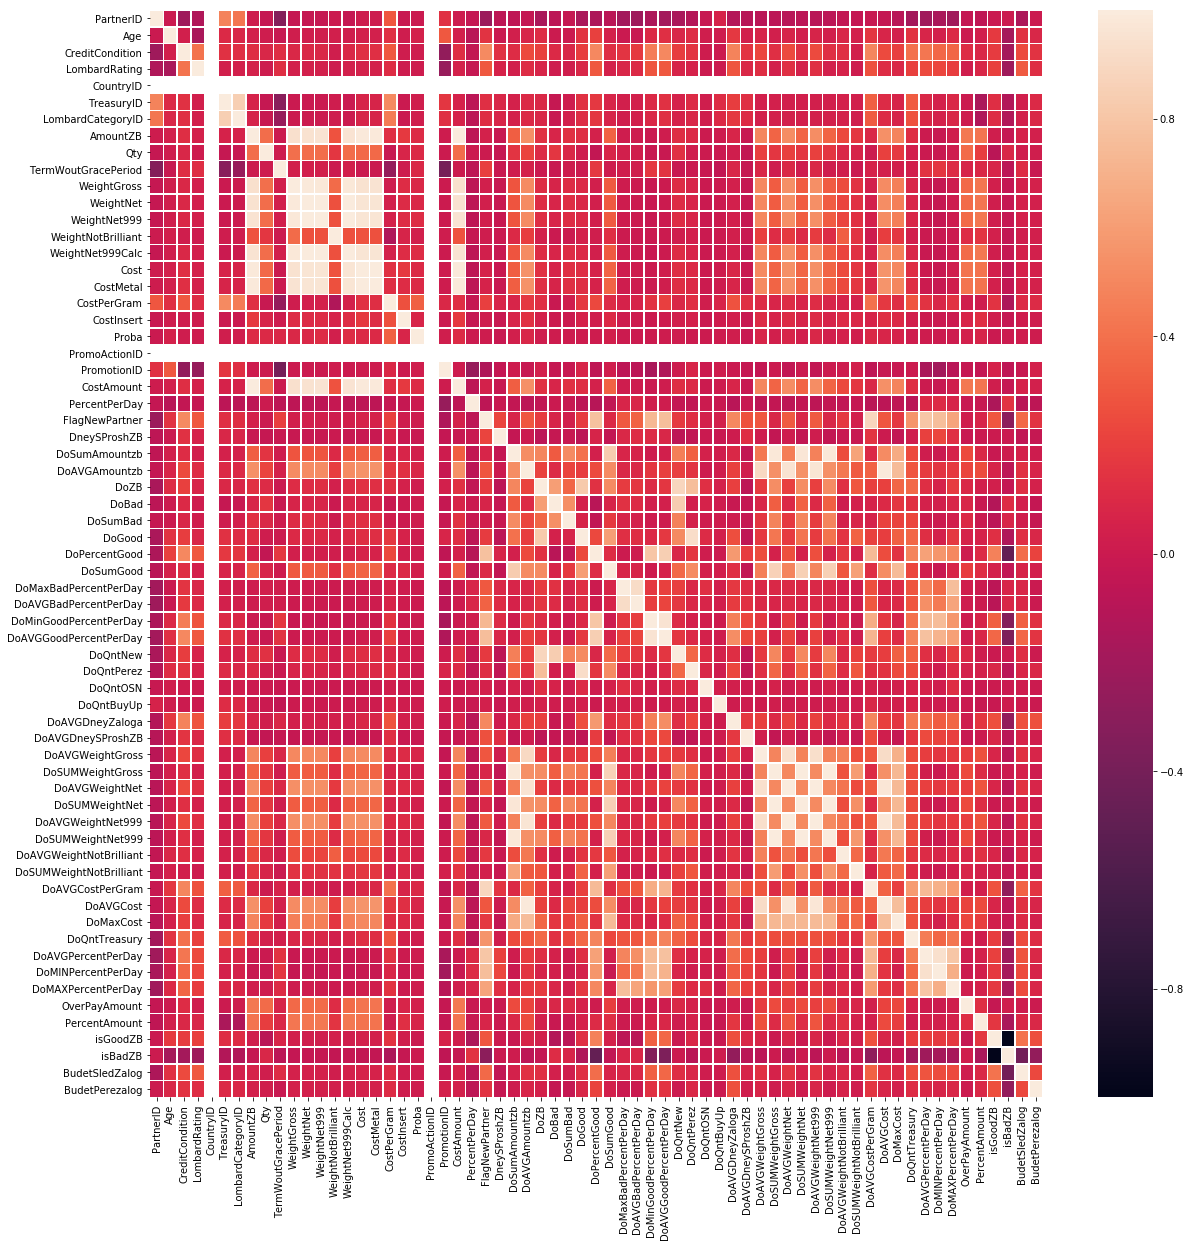

In [17]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(cormatrx,  linewidths=.5, ax=ax)

In [18]:
cormatrx.to_csv('cormtx.csv')

In [53]:
#наиболее значимые показатели для возврата ЗБ
ColumnsIsGood = ['Age','Sex','PartnerID','CreditCondition','LombardRating','TreasuryID','LombardCategoryID','CostPerGram','PercentPerDay','FlagNewPartner'\
                 ,'DoGood','DoPercentGood','DoMinGoodPercentPerDay','DoAVGGoodPercentPerDay','DoAVGDneyZaloga','DoAVGCostPerGram','DoQntTreasury','DoAVGPercentPerDay'\
                ,'DoMINPercentPerDay','DoMAXPercentPerDay','PercentAmount','isGoodZB']



In [ ]:
corr2 = data1[ColumnsIsGood].corr()
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(cormatrx,  linewidths=.5, ax=ax, )

In [34]:
X = StandardScaler().fit_transform(data1[ColumnsIsGood])

9219.375846552732
7659.089597086604
7160.89840782185
6948.152619996599
6788.687696880097
6619.595744738987
6383.479811637351


ValueError: x and y must have same first dimension, but have shapes (4,) and (7,)

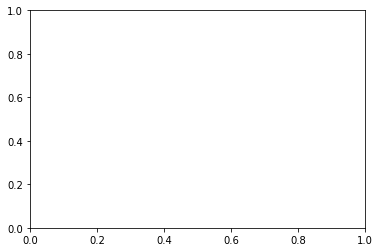

In [38]:
#подбор опитального количества кластеров
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    print(np.sqrt(kmeans.inertia_))



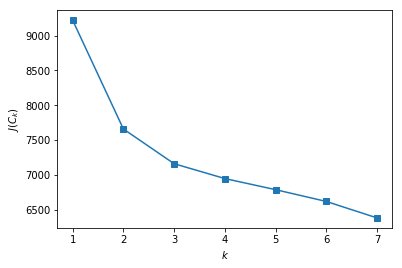

In [39]:
с

In [89]:
data1.columns

Index(['Code', 'PartnerID', 'Sex', 'Age', 'CreditCondition', 'LombardRating',
       'CountryID', 'TreasuryID', 'LombardCategoryID', 'City', 'Category',
       'AmountZB', 'Qty', 'IssueDate', 'TermWoutGracePeriod', 'WeightGross',
       'WeightNet', 'WeightNet999', 'WeightNotBrilliant', 'WeightNet999Calc',
       'Cost', 'CostMetal', 'CostPerGram', 'CostInsert', 'Proba',
       'PromoActionID', 'PromotionID', 'CostAmount', 'PercentPerDay',
       'FlagNewPartner', 'DneySProshZB', 'DoSumAmountzb', 'DoAVGAmountzb',
       'DoZB', 'DoBad', 'DoSumBad', 'DoGood', 'DoPercentGood', 'DoSumGood',
       'DoMaxBadPercentPerDay', 'DoAVGBadPercentPerDay',
       'DoMinGoodPercentPerDay', 'DoAVGGoodPercentPerDay', 'DoIssue',
       'DoQntNew', 'DoQntPerez', 'DoQntOSN', 'DoQntBuyUp', 'DoAVGDneyZaloga',
       'DoAVGDneySProshZB', 'DoAVGWeightGross', 'DoSUMWeightGross',
       'DoAVGWeightNet', 'DoSUMWeightNet', 'DoAVGWeightNet999',
       'DoSUMWeightNet999', 'DoAVGWeightNotBrilliant',
       'DoSUM

In [101]:
data1.fillna(0)
df_ob = pd.get_dummies(data1, columns = ['Proba'] \
                       ,drop_first = True)

train_labels = df_ob['isGoodZB']
train_data = df_ob.drop(['Category','Sex','isGoodZB','IssueDate','DoIssue','isBadZB','BudetSledVisit','BudetPerezalog','City','Code', 'PartnerID','CountryID', 'TreasuryID' ], axis=1)

In [99]:
for col in train_data.columns:
    if train_data[col].isnull().values.any():
        print(col)

In [103]:
train_data.shape

(4101542, 69)

In [104]:
select = SelectKBest(f_classif, k = 69)
X_new1 = select.fit(train_data, train_labels)

In [105]:
#
mask1 = X_new1.get_support()
sc1 = X_new1.scores_
new_train_data1 = []
for bool, feature, score in zip(mask1, train_data, sc1):
    if bool:
        new_train_data1.append([feature, score])

In [108]:
pd.DataFrame(new_train_data1).to_csv('VseZB.csv')

In [127]:
#Для первого залогового билета
train_labels1 = df_ob[(df_ob['DoZB']==0) & (df_ob['Category']=='Новая cсуда')]['isGoodZB']
train_data1 = df_ob[(df_ob['DoZB']==0) & (df_ob['Category']=='Новая cсуда')].drop(['Category','Sex','isGoodZB','IssueDate','DoIssue','isBadZB','BudetSledVisit','BudetPerezalog','City','Code'\
        , 'PartnerID','CountryID','TreasuryID','DneySProshZB', 'DoSumAmountzb', 'DoAVGAmountzb', 'DoZB', 'DoBad',
       'DoSumBad', 'DoGood', 'DoPercentGood', 'DoSumGood',
       'DoMaxBadPercentPerDay', 'DoAVGBadPercentPerDay',
       'DoMinGoodPercentPerDay', 'DoAVGGoodPercentPerDay', 'DoQntNew',
       'DoQntPerez', 'DoQntOSN', 'DoQntBuyUp', 'DoAVGDneyZaloga',
       'DoAVGDneySProshZB', 'DoAVGWeightGross', 'DoSUMWeightGross',
       'DoAVGWeightNet', 'DoSUMWeightNet', 'DoAVGWeightNet999',
       'DoSUMWeightNet999', 'DoAVGWeightNotBrilliant',
       'DoSUMWeightNotBrilliant', 'DoAVGCostPerGram', 'DoAVGCost', 'DoMaxCost',
       'DoQntTreasury', 'DoAVGPercentPerDay', 'DoMINPercentPerDay',
       'DoMAXPercentPerDay', 'OverPayAmount', 'PercentAmount' ], axis=1)

In [128]:
train_data1.shape

(947556, 33)

In [129]:
select = SelectKBest(f_classif, k = 33)
X_new1 = select.fit(train_data1, train_labels1)

In [130]:
#
mask1 = X_new1.get_support()
sc1 = X_new1.scores_
new_train_data1 = []
for bool, feature, score in zip(mask1, train_data, sc1):
    if bool:
        new_train_data1.append([feature, score])
pd.DataFrame(new_train_data1).to_csv('FirstZB.csv')

In [131]:
#Для больше одного ЗБ
train_labels1 = data1[(data1['DoZB']>0) & (data1['Category']=='Новая cсуда')]['isGoodZB']
train_data1 = data1[(data1['DoZB']>0) & (data1['Category']=='Новая cсуда')].drop(['Category','Sex','isGoodZB','IssueDate','DoIssue','isBadZB','BudetSledVisit','BudetPerezalog','City','Code', 'PartnerID'\
                         ,'CountryID','TreasuryID', ], axis=1)

In [134]:
select = SelectKBest(f_classif, k = train_data1.shape[1])
X_new1 = select.fit(train_data1, train_labels1)

In [135]:
#
mask1 = X_new1.get_support()
sc1 = X_new1.scores_
new_train_data1 = []
for bool, feature, score in zip(mask1, train_data, sc1):
    if bool:
        new_train_data1.append([feature, score])
pd.DataFrame(new_train_data1).to_csv('OtherZB.csv')

In [164]:
#Основные колонки для тех, у кого первый займ
Column1ZB = ['Age','LombardRating','LombardCategoryID','AmountZB','WeightGross','WeightNet','WeightNet999','WeightNotBrilliant','WeightNet999Calc'\
             ,'Cost','CostMetal','CostPerGram','PercentPerDay','isGoodZB']
FirstDF = data1[(data1['DoZB']>0) & (data1['Category']=='Новая cсуда')][Column1ZB]

In [165]:
FirstDF.reset_index(drop=True,inplace=True)
X1 = StandardScaler().fit_transform(FirstDF.drop('isGoodZB',axis=1))

In [167]:
kmeans = KMeans(n_clusters=2).fit(X1)
FirstDF['Labels'] = pd.DataFrame(kmeans.predict(X1))
#pylab.scatter(tsne_representation[:,0], tsne_representation[:, 1], c = labels, cmap='viridis')

In [168]:
FirstDF.head()

,Age,LombardRating,LombardCategoryID,AmountZB,WeightGross,WeightNet,WeightNet999,WeightNotBrilliant,WeightNet999Calc,Cost,CostMetal,CostPerGram,PercentPerDay,isGoodZB,Labels
0,47,2,58,18800.0,16.790001,16.790001,8.396,0.00,8,18888.0,18888.0,1124.955322,0.43,1,0
1,47,2,58,5461.0,3.370000,3.330000,2.498,0.04,2,5461.0,5461.0,1620.474731,0.43,1,0
2,48,2,58,4000.0,3.160000,3.100000,1.814,0.06,2,4061.0,4061.0,1285.126465,0.43,1,0
3,48,2,134,21500.0,15.530000,14.730000,8.618,0.80,9,22242.0,22242.0,1432.195679,0.43,0,0
4,48,2,123,4865.0,3.910000,3.310000,1.937,0.60,2,4865.0,4865.0,1244.245483,0.45,1,0


In [169]:
FirstDF[FirstDF['Labels']==0].describe()

,Age,LombardRating,LombardCategoryID,AmountZB,WeightGross,WeightNet,WeightNet999,WeightNotBrilliant,WeightNet999Calc,Cost,CostMetal,CostPerGram,PercentPerDay,isGoodZB,Labels
count,3.127145e+06,3.127145e+06,3.127145e+06,3.127145e+06,3.127145e+06,3.127145e+06,3.127145e+06,3.127145e+06,3.127145e+06,3.127145e+06,3.127145e+06,3.127145e+06,3.127145e+06,3.127145e+06,3127145.0
mean,3.900147e+01,2.294213e+00,8.703746e+01,7.264473e+03,6.997066e+00,6.624281e+00,3.853943e+00,3.721468e-01,3.870066e+00,7.771253e+03,7.676515e+03,1.107845e+03,3.371229e-01,7.949308e-01,0.0
std,1.378505e+01,1.934653e+00,9.130323e+01,9.728297e+03,8.865693e+00,8.402746e+00,4.905031e+00,1.578493e+00,4.922679e+00,1.023445e+04,1.006667e+04,3.338797e+02,1.281618e-01,4.037522e-01,0.0
min,-6.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.160000e+01,0.000000e+00,0.000000e+00,1.100000e-01,0.000000e+00,0.0
25%,2.900000e+01,0.000000e+00,1.200000e+01,2.218000e+03,2.290000e+00,2.180000e+00,1.258000e+00,0.000000e+00,1.000000e+00,2.450000e+03,2.430900e+03,8.598997e+02,2.700000e-01,1.000000e+00,0.0
50%,3.700000e+01,2.000000e+00,6.300000e+01,4.000000e+03,4.110000e+00,3.890000e+00,2.247000e+00,0.000000e+00,2.000000e+00,4.445500e+03,4.408000e+03,1.100000e+03,3.300000e-01,1.000000e+00,0.0
75%,4.900000e+01,4.000000e+00,1.150000e+02,8.000000e+03,7.770000e+00,7.370000e+00,4.288000e+00,2.300000e-01,4.000000e+00,8.579000e+03,8.498000e+03,1.364691e+03,3.900000e-01,1.000000e+00,0.0
max,9.900000e+01,8.000000e+00,4.050000e+02,1.525000e+05,1.207100e+02,1.101600e+02,6.900000e+01,1.100000e+02,7.000000e+01,1.540800e+05,1.077280e+05,8.143571e+04,2.700000e+00,1.000000e+00,0.0


In [170]:
FirstDF[FirstDF['Labels']==1].describe()

,Age,LombardRating,LombardCategoryID,AmountZB,WeightGross,WeightNet,WeightNet999,WeightNotBrilliant,WeightNet999Calc,Cost,CostMetal,CostPerGram,PercentPerDay,isGoodZB,Labels
count,26841.000000,26841.000000,26841.000000,2.684100e+04,26841.000000,26841.000000,26841.000000,26841.000000,26841.000000,2.684100e+04,2.684100e+04,26841.000000,26841.000000,26841.000000,26841.0
mean,38.596550,2.736336,92.413248,1.543060e+05,137.663577,132.365139,78.251911,5.280509,78.242651,1.633505e+05,1.618461e+05,1201.449923,0.238023,0.800976,1.0
std,11.664383,2.180894,90.915022,1.171811e+05,92.978818,90.452999,54.380140,13.171758,54.369376,1.174139e+05,1.171164e+05,293.733004,0.070646,0.399273,0.0
min,-6.000000,0.000000,0.000000,1.250010e+03,46.410000,6.670000,3.902000,0.000000,4.000000,1.410000e+03,1.410000e+03,3.257700,0.110000,0.000000,1.0
25%,29.000000,1.000000,40.000000,9.300000e+04,88.059998,83.879997,49.050999,0.000000,49.000000,9.865700e+04,9.779000e+04,950.481873,0.180000,1.000000,1.0
50%,37.000000,3.000000,57.000000,1.173740e+05,104.769997,101.540001,59.558998,0.020000,60.000000,1.258400e+05,1.242510e+05,1233.557495,0.200000,1.000000,1.0
75%,47.000000,5.000000,109.000000,1.915940e+05,157.449997,150.690002,89.068001,4.740000,89.000000,2.001130e+05,1.946590e+05,1424.767456,0.290000,1.000000,1.0
max,84.000000,8.000000,403.000000,3.023000e+06,2111.929932,2048.429932,1217.771973,282.820007,1217.000000,3.023075e+06,3.023075e+06,4841.692871,2.700000,1.000000,1.0


In [177]:
%%time
data_subset = scale(X1)
tsne = TSNE(n_components = 2, init = 'pca', random_state = 321) #,          n_iter  = 250, n_iter_without_progress =100) #последние ппараметры для ускорения работы
tsne_representation = tsne.fit_transform(data_subset)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\execution.py", line 1238, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 3, in <module>
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py", line 858, in fit_transform
    embedding = self._fit(X)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py", line 770, in _fit
    skip_num_points=skip_num_points)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py", line 812, in _tsne
    **opt_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py", line 339, in _gradient_descent
    error, grad = objective(p, *args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py", line 248, in _kl_divergence_bh
    c = 2.0 * (degrees_of_freedom + 1.0) / degrees_of_freedom
KeyboardInterrupt

During handling of the above exception, another except

KeyboardInterrupt: 

In [178]:
pylab.figure(figsize=(10, 6))
pylab.scatter(tsne_representation[:, 0], tsne_representation[:, 1],cmap='viridis')

NameError: name 'tsne_representation' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X1)
labels = kmeans.predict(X1)
pylab.scatter(tsne_representation[:,0], tsne_representation[:, 1], c = labels, cmap='viridis')

In [174]:
#Основные колонки для тех, у кого больше одного займа
Column2ZB = ['Age','CreditCondition','LombardRating','LombardCategoryID','Qty','CostPerGram','PercentPerDay','DoBad','DoSumBad','DoGood','DoPercentGood',\
'DoMaxBadPercentPerDay','DoAVGBadPercentPerDay','DoMinGoodPercentPerDay','DoAVGGoodPercentPerDay','DoQntNew', 'DoQntPerez','DoAVGDneyZaloga'\
,'DoAVGPercentPerDay','DoMINPercentPerDay','PercentAmount','isGoodZB']
SecondDF = data1[(data1['DoZB']>0) & (data1['Category']=='Новая cсуда')][Column2ZB]

In [175]:
SecondDF.reset_index(drop=True,inplace=True)
X2 = StandardScaler().fit_transform(SecondDF.drop('isGoodZB',axis=1))

8138.409304034787
7656.589908436266
7394.703872265743
7077.611181872833
6786.174162130014
6568.89134974236
6386.464537166763


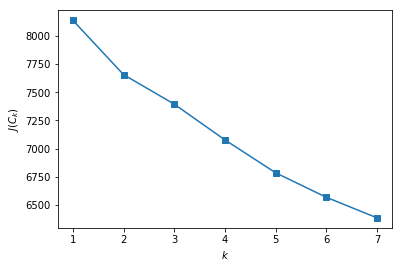

In [176]:

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X2)
    inertia.append(np.sqrt(kmeans.inertia_))
    print(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');
# возьмем  класстера

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.utils import check_X_y
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.cluster.unsupervised import check_number_of_labels

def silhouette_samples_memory_saving(X, labels, metric='euclidean', **kwds):
    X, labels = check_X_y(X, labels, accept_sparse=['csc', 'csr'])
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    check_number_of_labels(len(le.classes_), X.shape[0])

    unique_labels = le.classes_
    n_samples_per_label = np.bincount(labels, minlength=len(unique_labels))

    # For sample i, store the mean distance of the cluster to which
    # it belongs in intra_clust_dists[i]
    intra_clust_dists = np.zeros(X.shape[0], dtype=X.dtype)

    # For sample i, store the mean distance of the second closest
    # cluster in inter_clust_dists[i]
    inter_clust_dists = np.inf + intra_clust_dists

    for curr_label in range(len(unique_labels)):

        # Find inter_clust_dist for all samples belonging to the same
        # label.
        mask = labels == curr_label

        # Leave out current sample.
        n_samples_curr_lab = n_samples_per_label[curr_label] - 1
        if n_samples_curr_lab != 0:
            intra_distances = pairwise_distances(X[mask, :], metric=metric, **kwds)
            intra_clust_dists[mask] = np.sum(intra_distances, axis=1) / n_samples_curr_lab

        # Now iterate over all other labels, finding the mean
        # cluster distance that is closest to every sample.
        for other_label in range(len(unique_labels)):
            if other_label != curr_label:
                other_mask = labels == other_label
                inter_distances = pairwise_distances(X[mask, :], X[other_mask, :], metric=metric, **kwds)
                other_distances = np.mean(inter_distances, axis=1)
                inter_clust_dists[mask] = np.minimum(inter_clust_dists[mask], other_distances)

    sil_samples = inter_clust_dists - intra_clust_dists
    sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)
    # score 0 for clusters of size 1, according to the paper
    sil_samples[n_samples_per_label.take(labels) == 1] = 0
    return sil_samples

In [179]:
mas = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X2)
    labels = kmeans.predict(X2)
    mas.append(silhouette_samples_memory_saving(X2, kmeans.labels_))
    print((silhouette_samples_memory_saving(X2, kmeans.labels_)))

plt.plot(range(2, 8), mas, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

MemoryError: 

In [180]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN().fit(X2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % (len(set(labels)) - (1 if -1 in labels else 0)))
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
samples = X2.values
 
# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')
 
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )
 
plt.show()

In [21]:
data_r.head()

,Sex,Age,AllCntPledge,GoodPercent,DayWithUS,SredDneyMezdyZalog,CntIssueDate,ClientUshel,avgCreditCondition,sumLoanAmount,avgLoanAmount,sumPercentAmount,avgPercentAmount.1
0,F,32,111,64,2178,33,67,0.5,2,560291.23,5047.6687,31071.35,501.1508
1,F,54,1,0,0,0,1,1.0,0,2713.17,2713.1700,NaN,NaN
2,F,46,1,0,0,0,1,1.0,0,975.00,975.0000,NaN,NaN
3,F,18,2224,0,307,1,228,1.0,0,8702862.13,3881.7404,NaN,NaN
4,F,0,4,0,129,129,2,1.0,0,9257.00,2314.2500,NaN,NaN


In [22]:
data_r.shape

(1356640, 13)

In [23]:
del(data)

In [24]:
data_r['Sex'].replace('F',0,inplace=True)
data_r['Sex'].replace('M',1,inplace=True)

data_r = data_r[data_r['Sex']!='U']
data_r.fillna(0,inplace=True)

In [25]:
data_r.shape

(1356580, 13)

486770858.7511186
368878888.3951751
295722483.15462714
238720783.0705205
Wall time: 4min 49s


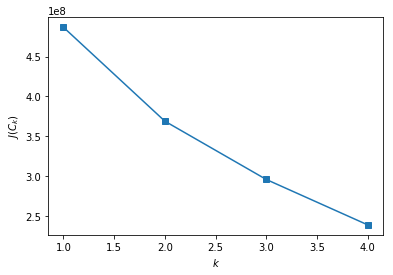

In [26]:
%%time
#подбор опитального количества кластеров
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_r)
    inertia.append(np.sqrt(kmeans.inertia_))
    print(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 5), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');
# возьмем 4 класстера

In [28]:
X = StandardScaler().fit_transform(data_r)

In [29]:
mas = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans.predict(X)
    mas.append(metrics.silhouette_score(X, kmeans.labels_))
    print((metrics.silhouette_score(X, kmeans.labels_)))

plt.plot(range(2, 8), mas, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

MemoryError: 

4199.46901405404
3749.6093469342827
3554.180507302518
3380.5543267485755
3215.176994620141
3088.98152653968
2964.8214869705744
2852.6236850914543
Wall time: 26min 8s


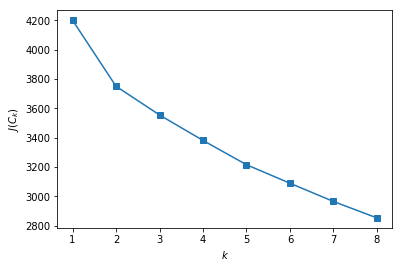

In [30]:
%%time
#подбор опитального количества кластеров
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    print(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 9), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');
# возьмем 4 класстера

In [ ]:
# по этому графику не видно заметных изменений для количества кластеров 3 и больше. С текущим набором столбцов подошло бы 2 кластера

In [31]:
%%time
data_subset = scale(data_r)
tsne = TSNE(n_components = 2, init = 'pca', random_state = 321,          n_iter  = 250, n_iter_without_progress =100) #последние ппараметры для ускорения работы
tsne_representation = tsne.fit_transform(data_subset)

Wall time: 9h 35min 51s


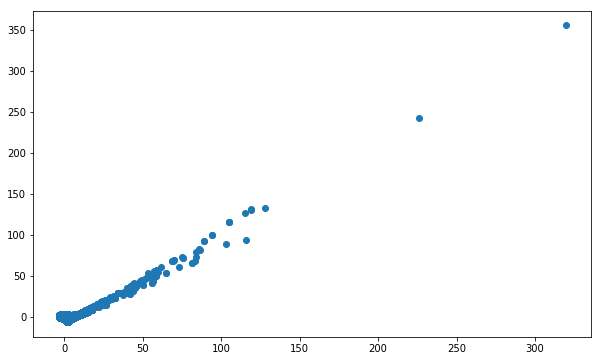

In [32]:
pylab.figure(figsize=(10, 6))
pylab.scatter(tsne_representation[:, 0], tsne_representation[:, 1],cmap='viridis')

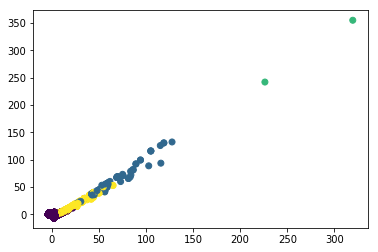

In [34]:
kmeans = KMeans(n_clusters=4).fit(data_r)
labels = kmeans.predict(data_r)
pylab.scatter(tsne_representation[:,0], tsne_representation[:, 1], c = labels, cmap='viridis')

In [36]:
from sklearn.cluster import DBSCAN

db = DBSCAN().fit(data_r)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

TypeError: unsupported operand type(s) for -: 'str' and 'int'

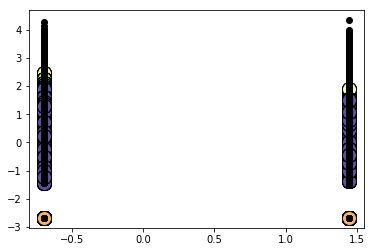

In [37]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % len(labels)-1)
plt.show()

In [41]:
pd.unique(labels)

array([   -1,     0,     1, ..., 11450, 11451, 11452], dtype=int64)